# Machine Learning Model to Predict the Point Spread of NBA Games

**Authors** 
* Jacob Thomas Johnson
* Brett Owen
* Juhi Sharma
* Christian Noel Sayson


**Abstract** :
The goal of this project is to achieve a reasonable accuracy in predicting the outcomes of individual NBA games. This is a lofty objective, and to meet it we will create a machine learning model. The model will be developed from testing various algorithms on the primary dataset (individual NBA games of the past 3 seasons), and then choosing the algorithm that performed the best. The NBA - and independent observers - track and record a large quantity of statistical data for every game. Everything from 3-Point Shooting Percentage to Personal Fouls and even Average Shot Distance is documented and easily found. This data will be fed into the model, and the model will unbiasedly decide what stats are important (the number of isolation plays a team runs) and what is not important (the amount of timeouts a team calls). After the model has decided which stats to prioritize or discard; we will feed it a structured dataset of teams and matchups (made up primarily of historical player statistics) and attempt to predict the point margin of any given game.

## Introduction

The National Basketball Association, more commonly known as the NBA, is a professional basketball league in North America consisting of 30 teams. Each team has 15 players on it’s roster, and they play 82 games every season (1230 league-wide total games). Given the huge amount of statistical categories catalogued for every single game, the NBA has a plethora of historical data. What is all this data used for? Outside of using it as talking points when debating the eternal question: Lebron James vs. Michael Jordan… many teams employ data scientists and statisticians to give their players an edge on the court. In fact, it’s these people that are primarily responsible for the extreme shift in playstyle over the past decade. Basketball used to be ruled by verticality, or to be more descriptive: a 7-foot tall guy shooting over another 7-footer in close proximity to the rim. But now, it’s ruled horizontally. Why? Because it took 70 years for everyone to realize that usually, a 3 point shot was more efficient than a 2 point shot. But that realization is very old news. To gain any advantage now, teams require more cutting edge analytics. But data science and analytics and advanced stats have not only revolutionized the NBA. Their rise in prevalence and popularity have also transformed the way the NBA is seen externally.

Vegas - and sports gambling in general - has seen a dramatic surge recently. This is mostly due to more widespread legalization across the United States, and the popularity of sports betting platforms such as DraftKings or FanDuel that provide convenience and accessibility to their patrons. Which makes Vegas very happy. But Vegas isn’t happy about a small subset of the population; a subset that is doing what has long been considered impossible: beating the House. How are they doing it? Among other things, using Machine Learning. It’s not a simple task, of course. Beating the House never is. Why NBA games? The NBA is considered the least variable league. Any given game is more likely to go as expected than the other major leagues. This is largely due to the nature of the sport; there are less players on the court, and the best players get the vast majority of minutes. Furthermore, there is virtually no luck in Basketball, it’s almost entirely skill based. The less random something is, the easier it is to predict. And therefore to build and develop models upon. But it’s still not easy. Even achieving a 45% accuracy would put a model in the upper echelon. 55% is considered professional. Anything greater than 60%, and you’re essentially a millionaire. We’re not aiming to be millionaires - or to do any betting at all, but we are aiming to achieve a decent accuracy. 

How are we going to predict the point spread of NBA games? It starts with the data. Collecting, formatting, and shaping the extensive supply of stats is a formidable undertaking. Fortunately, we can use the efforts of those who came before us. This dataset, based on the official NBA stats website, contains 5 csv’s of game, team, and player stats from 2004-2020; which should be more than substantial enough for our model. A useful data set is required in building a successful model. It needs to contain all the relevant stats the model could prioritize while being formatted correctly and efficiently so the model can retain precision. 


## Problem Statement

We are attempting to predict the point spread of individual NBA games using a model that has decided what statistics are most important in determining the spread.

For the accuracy benchmark, we will be using the actual results of the games versus what our model predicted.

We are hoping to achieve an accuracy in the 30-40% range, based on our current assumptions. The most prolific models generally achieve 52-58%, with almost no models going above 60% for any given stretch of time. Such models are usually developed by professionals with far more experience and resources, obtaining an accuracy remotely close to that would be an achievement.

### Related Work

Vegas cares about this problem quite a bit, as do the people who attempt to do this exact thing for a living. It’s impact is minimal outside of sports betting and the NBA, but in those spheres it’s effect is substantial. Implications of better solutions would include possibly changing how NBA teams view players. And if those better solutions were better enough, their creators could become quite wealthy off of them. 

Speaking of better solutions and wealthy creators, this problem has already been ‘solved’. At the least, people have created models that have granted them success in the Vegas Markets. Particularly, Bob Voulgaris created the ‘Ewing’ model back in 2007-2010 with ‘The Whiz’ (his anonymous partner, evidently a math/comp sci/data science prodigy). It was one of the first such models, and an extraordinarily successful one. It’s exact accuracy is unknown, but Voulgaris (at least claims) to have made millions using it. There are other various models we have researched, but none are as notable. Furthermore, predicting the points spread of NBA games or even just the binary Win/Loss is a popular Machine Learning project, so there are plenty of resources at our disposal. 

## Data Management 

The important questions of interest are centered upon what data to include. There might be statistics that we think are irrelevant, but the model finds to be correlated. 
* Should we subjectively take out certain variables beforehand to clean up the dataset? Or should we only let the model decide what’s truly important? 
* Player driven data vs. team driven data is another question of interest. Player driven data would undoubtedly be more precise and accurate, but is also more unwieldy to work with. 
* How many seasons back should we feed the model? The NBA playstyle and ‘meta’ has changed significantly over the years, even as close as 2012 the game was far different. Does this matter for model integrity? 

### Data Gathering

We are using the [nba_api](https://github.com/swar/nba_api), which has CSV files containing historical game, player, and team stats from 2004-2020. This should be more than enough data to test and complete our model, barring a need for more advanced or obscure statistics to increase model quality.

Most advanced stats have formulas derived from the statistics in our current CSV’s, and since we haven't been able to find more data that hold the specific stats we're looking for, we had to calculate them by hand. We were considering using player data to add even more features, but doing that for each team's constantly changing player rosters throughout the seasons didn't seem feasable in the scope of the project. Fortunately, using the team data from the nba_api has been easy to use and we had recieved some promising results when experimenting. In future iterations of the project, it might be worth it to incorperate player statistics, at least the averages for a team. 

### Data Pre-processing, Cleaning, Labeling, and Maintenance 
For our simplest data cleaning, we dropped any game that has NaN values, along with any other missing data from team stats. We also dropped non-essential catagorical data, such as team names, game ID's, and date/times. 

Unfortunately, the nba_api had a few quirks we had to work around in order to get usable results. First, the dataset includes every NBA league since 2004, including WNBA, Minor league NBA, and one-off or promotional events like All-Star Games. Cleanup had to include filtering the dataset to only include the original NBA league, since the stats between one league and another (and what a model would take from them) might vary wildly. Second, each game has two rows of data in the dataset, one for the home team and the away team. We had to combine those two rows, omit any redundant data, and specify which feature set belonged to the opposing team before moving forward. 

We then had to add features for each team involved in a game. The features we've added are what's considered to be essential team stats from websites like [Basketball-Reference.com](https://www.basketball-reference.com/about/glossary.html). Thats we used are the following: Effective Field Goal Percentage(EFG%), Turnover Percentage(TOV%), Offensive Rebound Percentage(ORB%), Defensive Rebound Percentage(DRB%), Total Rebound Percentage(TRB%), Free Throw Rate(FTR), True Shooting Percentage(TS), Assist Rate(AST), Block Percentage(BLK%), Possessions(POSS), Pace Factor(PACE), Steal Percentage(STL%), Offensive Rating(ORTG), and Defensive Rating(DRTG). 

As for normalization, we normalized our features using Z-Scores.

Here's the correlation heatmap for our scores

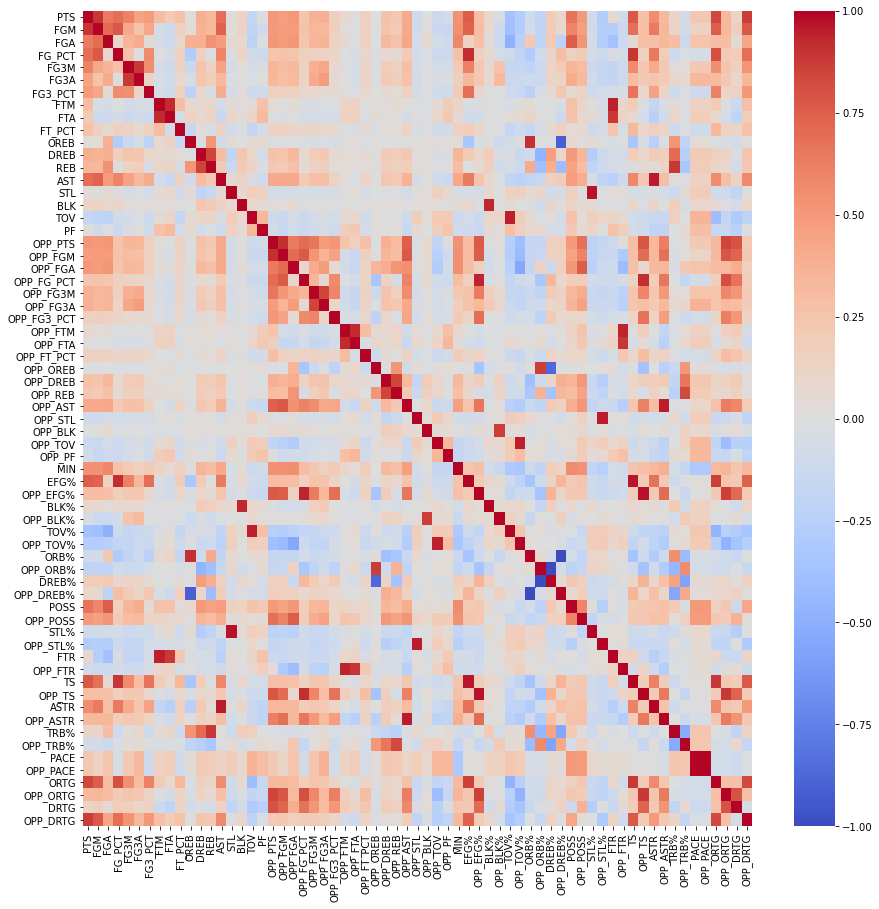

## Machine Learning Approaches

### Describe the ML methods that you used and the reasons for their choice. 
Since the point margin isn't a binary option, we couldn't use a classification model. We instead went for a regression, trying out linear and ridge regression models before deciding to try elastic net. This was because we had a high amount of features, and a lot of them were correlated. Initially, we thought lasso regression might help with automatic feature selection for our roughly 66 features, since the weights it put on features could become zero and remove any of its influence from the model at all. However, because the features are so correlated, lasso by itself didn't help/reduce features and only helped to make the model overfit more. We ran into a similar problem with Ridge regression, but at the very least found more usable results there. In the end, we used ElasticNet, a model that linearly combines both lasso and ridge regression, in order to get the best of both models and hopefully a far better accuracy.

One of the big problems with our model was that the way we processed each match independently led to a lot of innacuracies. To fix this, we applied a rolling average to each of the features in the dataset. Not only does this emulate the way teams settle into a certain "groove" over a season or gradually improve or decline in ability, but also reduces the randomness that might be throwing the model off in terms of accuracy.

We also included an SVM to in an attempt to increase the model's accuracy. When running the notebook with our code for our SVM, however, we found that it took a long time to build the model and use it to predict. We also found that the accuracy became a lot worse than that of our regular models. 

## Experiments

For each of our models, we measured their mean squared error and accuracy scores. We took these scores before and after applying z-score normalization. We kept the rolling averages for either of these runs. 

Before Z-Score normalization:

|Model| Accuracy|MSE|
|---|:---:|:---:|
|Ridge | 21.12% | 158.94| 
|Lasso | 21.22% | 158.73 | 
|ElasticNet (alpha = .001)|21.18% | 158.80|
|SVR | 8.48 | 176.4597 |

After Z-Score Normalization: 

|Model| Accuracy|MSE|
|---|:---:|:---:|
|Ridge | 21.10% | 158.97| 
|Lasso | 21.24% | 158.68 | 
|ElasticNet (alpha = .001)|21.10%| 158.98|
|SVR | 18.66% | 163.8936 |

Since we had a hard time finding an alpha score for elasticNet, we tested multiple different alphas to see which led to better accuracy. 

Elastic Net without Z-score normalization:

|Alpha Value| Accuracy|MSE|
|---|:---:|:---:|
0.0010 |0.2118 |158.80
0.0100 |0.2120 |158.77
0.1000 |0.2121 |158.74
0.2000 |0.2120 |158.77
0.3000 |0.2116 |158.84
0.4000 |0.2111 |158.95
0.5000 |0.2104 |159.09 
0.6000 |0.2095 |159.26
0.7000 |0.2085 |159.46
0.8000 | 0.2074 |159.69
0.9000 | 0.2062 |159.94
1.0000 | 0.2049 |160.20

Elastic Net with Z-score normalization:

|Alpha Value|Accuracy|MSE|
|---|:---:|:---:|
|0.0010|21.10|158.98 |
|0.0100|21.25 | 158.67 | 
0.1000 | 21.14 | 158.88
0.2000 | 20.86 | 159.46
0.3000 | 20.46 | 160.25
0.4000 | 19.53 | 162.14
0.6000 | 19.03 | 163.15
0.7000 | 18.50 | 164.20
0.8000 | 17.97 | 165.28
0.9000 | 17.42 | 166.38
1.0000 | 16.88 | 167.47

## Conclusions and Further things to improve upon 

While most of our models ended up having an average score of around 21%, the model that got the highest score was Elastic Net with an alpha of 0.01. It's unfortunate that we couldn't increase this score, but there are definitely ways to improve this score. 

There were several things we wanted to include but ran out of time to implement. 

## References

[nba_api](https://github.com/swar/nba_api)
[Basketball-Reference.com](https://www.basketball-reference.com/about/glossary.html)

## Appendix 
### team member contributions: 
* Jacob Thomas Johnson: Code, feature selection/calculations, research and data selection
* Brett Owen: Code, Report/presentation creation, basic regression model implementation
* Juhi Sharma: Code, Report/presentation creation, 
* Christian Noel Sayson: Code, feature selection/calculations, elastic Net Implementation
